In [1]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

In [21]:
def show_image(img):
    plt.figure()#layout='tight', frameon=False)
    #plt.axis('off')
    plt.imshow(img.permute(1, 2, 0).numpy().astype(np.uint8))

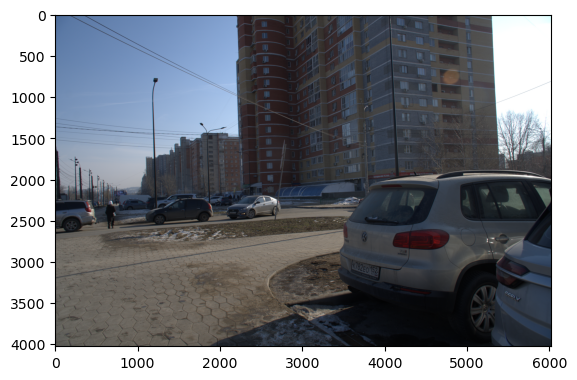

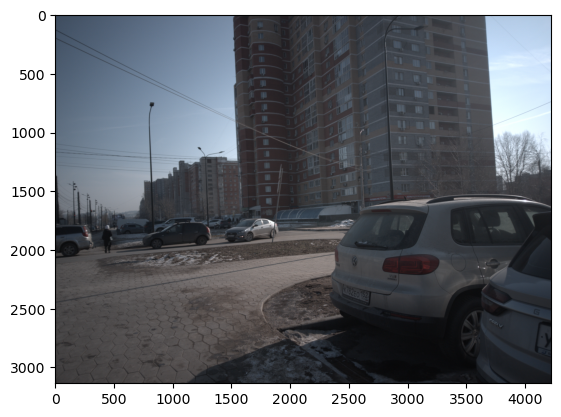

In [22]:
base = Image.open('../image_sony.png')
base_torch = torch.from_numpy(np.asarray(base).copy()).permute(2, 0, 1)
complementary = Image.open('../image_kv.png')
comp_torch = torch.from_numpy(np.asarray(complementary).copy()).permute(2, 0, 1)
show_image(base_torch)
show_image(comp_torch)

In [16]:
import intersection
import importlib
importlib.reload(intersection)

slicer = intersection.Intersection(threshold=0.2)

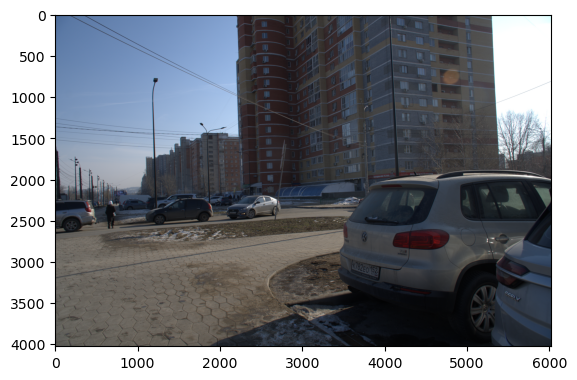

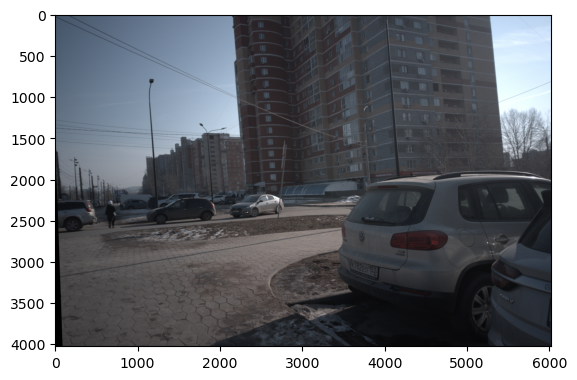

In [29]:
keypoints = slicer.get_keypoints(base, complementary)[0]
base_k = keypoints['keypoints0'].unsqueeze(0).float()
comp_k = keypoints['keypoints1'].unsqueeze(0).float()
# H = slicer.get_homography(base_k, comp_k)
# warped_base = slicer.warp_image(base_torch.unsqueeze(0).float()/255, H, dsize=(complementary.height, complementary.width))
# show_image(warped_base.squeeze() * 255)
# show_image(comp_torch)
H = slicer.get_homography(comp_k, base_k)
warped_comp = slicer.warp_image(comp_torch.unsqueeze(0).float()/255, H, dsize=(base.height, base.width))
show_image(base_torch)
show_image(warped_comp.squeeze() * 255)
